### Evaluation procedure #1: Train and test on the entire dataset

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X, y)

yPred = logreg.predict(X)

In [37]:
from sklearn import metrics

print(metrics.accuracy_score(y, yPred))

0.96


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


### Evaluation procedure #2: Train/test split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [62]:
k_range = list(range(1, 26))
scoresTraining = []
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predTraining = knn.predict(X_train)
    scoresTraining.append(metrics.accuracy_score(y_train, y_predTraining))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

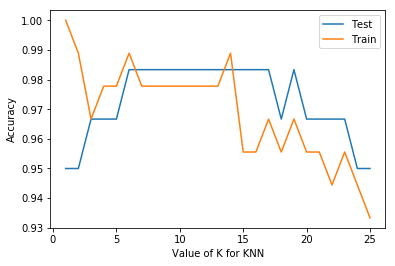

In [68]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores,label='Test')
plt.plot(k_range, scoresTraining,label='Train')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()